In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import imblearn as imb
from collections import Counter
from numpy import where
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv('dataset.csv')

In [7]:
data

,PH,cahaya,intensitas air,suhu,PPM,tinggi air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


## 1. Mengganti nama kolom yang menggunakan spasi

In [8]:
data.columns

Index(['PH', 'cahaya', 'intensitas air', 'suhu', 'PPM', 'tinggi air', 'aksi'], dtype='object')

In [9]:
column = ['PH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air',
       'aksi']

data.columns = column

In [10]:
data.columns

Index(['PH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air', 'aksi'], dtype='object')

## 2. Mengganti data kategorikal menjadi bentuk numerical (Clue : Labelencoder tidak bekerja ketika ada missing value, gunakan metode lain)

In [11]:
def category_to_num_cahaya(category):
    if category=='Ada':
        return 1
    elif category=='Tidak ada':
        return 0
    else:
        return category

data["cahaya"]=data["cahaya"].apply(category_to_num_cahaya)
data

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,1.0,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,1.0,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,1.0,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,1.0,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,1.0,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,1.0,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,1.0,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


In [12]:
def category_to_num_intensitas(category):
    if category=='Rendah sekali':
        return 0.0
    elif category=='Rendah':
        return 1.0
    elif category=='Cukup':
        return 2.0
    elif category=='Tinggi':
        return 3.0
    else:
        return category

data["intensitas_air"]=data["intensitas_air"].apply(category_to_num_intensitas)
data

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,3.0,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,1.0,3.0,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,1.0,3.0,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,1.0,3.0,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,3.0,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,1.0,0.0,25.3,904.0,47,Hidupkan Lampu
612,2.1,1.0,0.0,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,1.0,0.0,25.3,793.0,19,Hidupkan Lampu
614,1.4,1.0,0.0,25.4,1052.0,3,Hidupkan Lampu


In [13]:
def category_to_num_aksi(category):
    if category=='Tidak melakukan apa-apa':
        return 0.0
    elif category=='Hidupkan Lampu':
        return 1.0
    elif category=='Hidupkan Pompa nutrisi TDS':
        return 2.0
    elif category=='Hidupkan Lampu dan Pompa nutrisi TDS':
        return 3.0
    else:
        return category

data["aksi"]=data["aksi"].apply(category_to_num_aksi)
data

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,3.0,27.0,188.0,622,3.0
1,5.7,1.0,3.0,26.9,79.0,557,3.0
2,6.0,1.0,3.0,27.0,11.0,491,3.0
3,6.5,1.0,3.0,27.1,345.0,12000,0.0
4,6.2,NaN,3.0,27.1,602.0,444,0.0
...,...,...,...,...,...,...,...
611,4.6,1.0,0.0,25.3,904.0,47,1.0
612,2.1,1.0,0.0,25.0,388.0,18,3.0
613,3.2,1.0,0.0,25.3,793.0,19,1.0
614,1.4,1.0,0.0,25.4,1052.0,3,1.0


## 3. Handle Missing Value

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PH              600 non-null    float64
 1   cahaya          590 non-null    float64
 2   intensitas_air  616 non-null    float64
 3   suhu            589 non-null    float64
 4   PPM             611 non-null    float64
 5   tinggi_air      616 non-null    int64  
 6   aksi            616 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 33.8 KB


In [15]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/616)*100})
missing_data

,total_missing,perc_missing
PH,16,2.597403
cahaya,26,4.220779
intensitas_air,0,0.000000
suhu,27,4.383117
PPM,5,0.811688
tinggi_air,0,0.000000
aksi,0,0.000000


In [16]:
columns_missing = ['PH', 'cahaya', 'suhu', 'PPM']

for col in columns_missing:
    data[col].replace(np.nan, data[col].mean(), inplace=True)
    
data.isnull().sum()

PH                0
cahaya            0
intensitas_air    0
suhu              0
PPM               0
tinggi_air        0
aksi              0
dtype: int64

## 4. Detect outliers dan handling (bisa dihapus atau diganti nilainya dengan mean/modus/median)

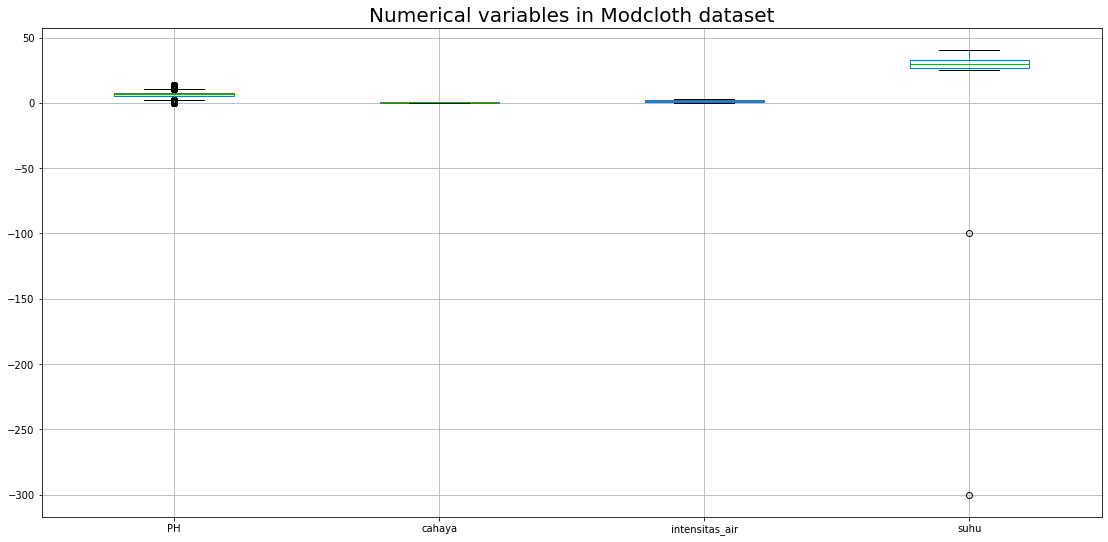

In [17]:
num_cols = ['PH', 'cahaya', 'intensitas_air', 'suhu']
plt.figure(figsize=(19,9))
data[num_cols].boxplot()
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show()

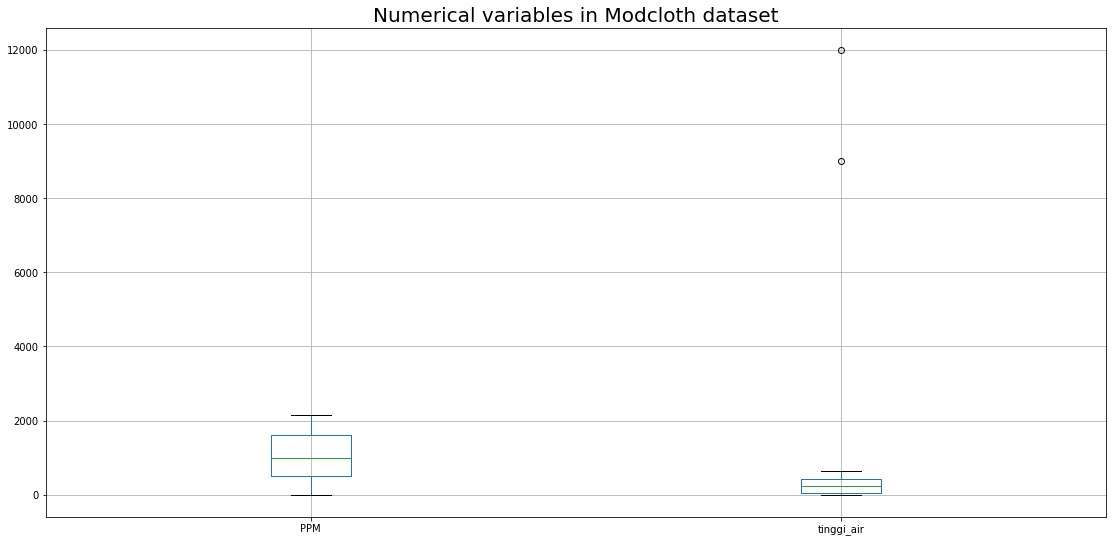

In [18]:
num_cols = ['PPM', 'tinggi_air']
plt.figure(figsize=(19,9))
data[num_cols].boxplot()
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show()

In [19]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

columns_outlier = ['tinggi_air', 'suhu']
for col in columns_outlier:
    outliers=[]
    outlier_datapoints = detect_outlier(data[col])
    print(col, outlier_datapoints)

tinggi_air [12000, 9000]
suhu [-300.0, -100.0]


In [20]:
data.drop(data.loc[(data.tinggi_air == 12000) | (data.tinggi_air==9000)].index, inplace=True)

In [21]:
data.drop(data.loc[(data.suhu == -300) | (data.suhu==-100)].index, inplace=True)

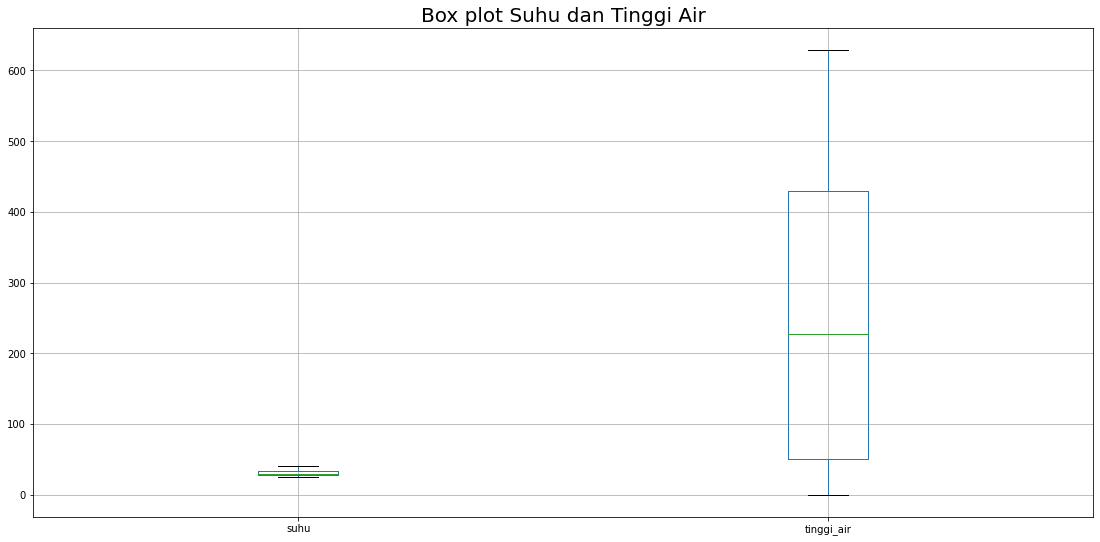

In [22]:
num_cols = ['suhu', 'tinggi_air']
plt.figure(figsize=(19,9))
data[num_cols].boxplot()
plt.title("Box plot Suhu dan Tinggi Air", fontsize=20)
plt.show()

## 5. Pisahkan data feature dengan label

In [23]:
# Memisahkan antara fitur dan label

# Fitur
# iloc[rows,columns] (Slicing pada dataframe)
# Mengambil semua data dalam barisan.
# Mengambil kolom index ke-0 sampai ke-5
X = data.iloc[:,:6].values

# Label
# iloc[rows,columns] (Slicing pada dataframe)
# Mengambil semua data dalam barisan.
# Hanya Mengambil kolom index ke-6
Y = data.iloc[:,6].values

In [24]:
print(X, Y)

[[6.500e+00 1.000e+00 3.000e+00 2.700e+01 1.880e+02 6.220e+02]
 [5.700e+00 1.000e+00 3.000e+00 2.690e+01 7.900e+01 5.570e+02]
 [6.000e+00 1.000e+00 3.000e+00 2.700e+01 1.100e+01 4.910e+02]
 ...
 [3.200e+00 1.000e+00 0.000e+00 2.530e+01 7.930e+02 1.900e+01]
 [1.400e+00 1.000e+00 0.000e+00 2.540e+01 1.052e+03 3.000e+00]
 [5.000e+00 1.000e+00 0.000e+00 2.530e+01 9.770e+02 1.900e+01]] [3. 3. 3. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 3. 3. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 3. 3. 3. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

## 6. Check Imbalanced Dataset, jika imbalanced, gunakan smote

In [25]:
#pip install imbalanced-learn

In [26]:
data.aksi.value_counts()

0.0    469
1.0     92
3.0     39
2.0     12
Name: aksi, dtype: int64

In [27]:
counter = Counter(Y)
print(counter)

Counter({0.0: 469, 1.0: 92, 3.0: 39, 2.0: 12})


In [28]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=5)
X_smote, Y_smote = oversample.fit_resample(X, Y)

In [29]:
counter = Counter(Y_smote)
print(counter)

Counter({3.0: 469, 0.0: 469, 1.0: 469, 2.0: 469})


## 7. Visualisasikan Tiap feature dengan label

## 8. Lakukan Normalization menggunakan MinMaxScaler atau Standardization menggunakan StandarScaler

In [30]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # transform data
# scaled = scaler.fit_transform(X)
# print(scaled)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
# transform data
scaled_smote = scaler.fit_transform(X_smote)
print(scaled_smote)

[[0.46428571 1.         1.         0.12820513 0.08705773 0.98887122]
 [0.40714286 1.         1.         0.12179487 0.03631285 0.88553259]
 [0.42857143 1.         1.         0.12820513 0.00465549 0.78060413]
 ...
 [0.39516374 1.         0.22569228 0.10236391 0.11720241 0.37094264]
 [0.36258525 1.         0.12295273 0.12820513 0.04182308 0.70387665]
 [0.29135584 1.         0.33333333 0.10184703 0.10991227 0.21581727]]


In [32]:
scaler =  MinMaxScaler()
# transform data
scaled = scaler.fit_transform(X)
print(scaled)

[[0.46428571 1.         1.         0.12820513 0.08705773 0.98887122]
 [0.40714286 1.         1.         0.12179487 0.03631285 0.88553259]
 [0.42857143 1.         1.         0.12820513 0.00465549 0.78060413]
 ...
 [0.22857143 1.         0.         0.01923077 0.36871508 0.03020668]
 [0.1        1.         0.         0.02564103 0.48929236 0.00476948]
 [0.35714286 1.         0.         0.01923077 0.45437616 0.03020668]]


## 9. Buat model ANN (SMOTE)

In [33]:
model = Sequential()

In [34]:
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

In [35]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_smote,Y_smote, test_size = 0.2, random_state = 42)

In [37]:
hasil = model.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_split=0.3)

Epoch 1/100
33/33 [==============================] - 2s 16ms/step - loss: 1.4228 - accuracy: 0.1015 - val_loss: 1.3146 - val_accuracy: 0.4289
Epoch 2/100
33/33 [==============================] - 0s 5ms/step - loss: 1.2853 - accuracy: 0.5554 - val_loss: 1.2003 - val_accuracy: 0.6556
Epoch 3/100
33/33 [==============================] - 0s 5ms/step - loss: 1.1665 - accuracy: 0.6452 - val_loss: 1.0525 - val_accuracy: 0.6667
Epoch 4/100
33/33 [==============================] - 0s 8ms/step - loss: 1.0087 - accuracy: 0.6782 - val_loss: 0.8753 - val_accuracy: 0.7578
Epoch 5/100
33/33 [==============================] - 0s 5ms/step - loss: 0.8192 - accuracy: 0.7742 - val_loss: 0.7169 - val_accuracy: 0.8089
Epoch 6/100
33/33 [==============================] - 0s 5ms/step - loss: 0.6633 - accuracy: 0.8337 - val_loss: 0.5859 - val_accuracy: 0.8644
Epoch 7/100
33/33 [==============================] - 0s 5ms/step - loss: 0.5695 - accuracy: 0.8448 - val_loss: 0.4899 - val_accuracy: 0.8911
Epoch 8/100


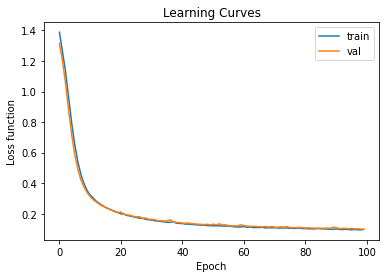

In [38]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss function')
plt.plot(hasil.history['loss'], label='train')
plt.plot(hasil.history['val_loss'], label='val')
plt.legend()
plt.show()

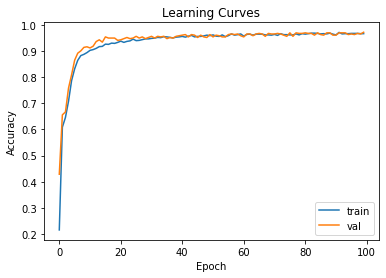

In [40]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hasil.history['accuracy'], label='train')
plt.plot(hasil.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [41]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy_model: %.3f' % acc)

Test Accuracy_model: 0.960


## 10. Buat model ANN (NON-SMOTE)

In [42]:
model_nosmote = Sequential()
model_nosmote.add(Dense(16, input_shape=(6,), activation='relu'))
model_nosmote.add(Dense(32, activation='relu'))
model_nosmote.add(Dense(4, activation='sigmoid'))

model_nosmote.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [43]:
from sklearn.model_selection import train_test_split

x_train_nosmote, x_test_nosmote, y_train_nosmote, y_test_nosmote = train_test_split(scaled,Y, test_size = 0.2, random_state = 42)


In [44]:
hasil_nosmote = model_nosmote.fit(x_train_nosmote, y_train_nosmote, batch_size = 32, epochs = 100, validation_split=0.3)

Epoch 1/100
11/11 [==============================] - 1s 31ms/step - loss: 1.3857 - accuracy: 0.2649 - val_loss: 1.2932 - val_accuracy: 0.7823
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 1.2706 - accuracy: 0.7525 - val_loss: 1.1831 - val_accuracy: 0.7959
Epoch 3/100
11/11 [==============================] - 0s 10ms/step - loss: 1.1640 - accuracy: 0.7713 - val_loss: 1.0729 - val_accuracy: 0.7959
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 1.0515 - accuracy: 0.7776 - val_loss: 0.9585 - val_accuracy: 0.7959
Epoch 5/100
11/11 [==============================] - 0s 10ms/step - loss: 0.9471 - accuracy: 0.7667 - val_loss: 0.8524 - val_accuracy: 0.7959
Epoch 6/100
11/11 [==============================] - 0s 9ms/step - loss: 0.8377 - accuracy: 0.7779 - val_loss: 0.7657 - val_accuracy: 0.7959
Epoch 7/100
11/11 [==============================] - 0s 10ms/step - loss: 0.7799 - accuracy: 0.7660 - val_loss: 0.7052 - val_accuracy: 0.7959
Epoch 8/

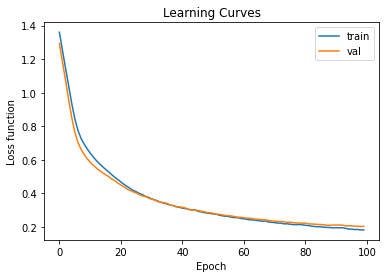

In [45]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss function')
plt.plot(hasil_nosmote.history['loss'], label='train')
plt.plot(hasil_nosmote.history['val_loss'], label='val')
plt.legend()
plt.show()

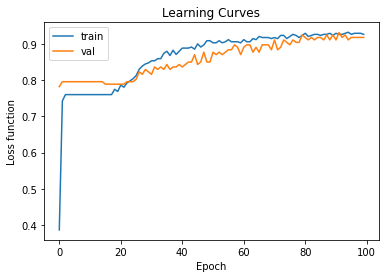

In [47]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss function')
plt.plot(hasil_nosmote.history['accuracy'], label='train')
plt.plot(hasil_nosmote.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [48]:
loss, acc = model.evaluate(x_test_nosmote, y_test_nosmote, verbose=0)
print('Test Accuracy_model: %.3f' % acc)

Test Accuracy_model: 0.927
